# Table of contents
## 1. Basics
### 1.1 [Import Section](#imports)
### 1.2 [Numpy](#numpy)
### 1.3 [Matplotlib](#plotly)
## 2. [Deep Learning](#deep)
### 2.1 [Convolutional Layers](#convolution)
#### 2.1.1 [Loading a model](#load)
### 2.2 [Recurrent Layers](#recurrent)
### 2.3 [Dense Layers](#dense)

## Basics
This section will cover the basics of a jupyter notebook
### Import section<a name="imports">

<ul>
    <li>Numpy allows different parallel operations on lists of different shapes.</li>
    <li>Pandas allows to create Dataframes (Tables) that support numpy operations.</li>
    <li>Matplotlib is a library to plot data.</li>
    <li>Tensorflow is a framework to create, run, save and load Neural networks.</li>
    <li>Keras is build on top of tensorflow and makes its operations easier and faster.</li>    
</ul>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


CIFAR10 is a dataset that contains thousands of low resolution images. It is normally used for image classification problems where the idea is to create a model that can classify the image and identify what is inside of it. The different labels are:
<ol>
    <li>Airplane</li>
    <li>Automobile</li>
    <li>Bird</li>
    <li>Cat</li>
    <li>Deer</li>
    <li>Dog</li>
    <li>Frog</li>
    <li>Horse</li>
    <li>Ship</li>    
    <li>Truck</li>    
</ol>

In [8]:
# Loads CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Path for saving the model
convolutional_path = 'convolutional_example.h5'

### Numpy<a name='numpy'>
This is a package that handles vectors in parallel. Useful for fasat operations with lists and matrixes.

In [3]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [4]:
train_labels.shape

(50000, 1)

In [5]:
train_images.mean(), train_images.std(), train_images.max(), train_images.min()

(0.4733630004850874, 0.25156892506322026, 1.0, 0.0)

In [6]:
train_images.shape

(50000, 32, 32, 3)

### Matplotlib <a name='plotly'>
We need a function to change the numeric labels of Y to actual string

In [3]:
dictionary_labels = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}

We can use a function or a lambda function.

In [4]:
F = lambda x: dictionary_labels[x[0]]
def transform_labels(number):
    return dictionary_labels[number[0]]

In [5]:
labels_train = np.apply_along_axis(F, 1, train_labels)

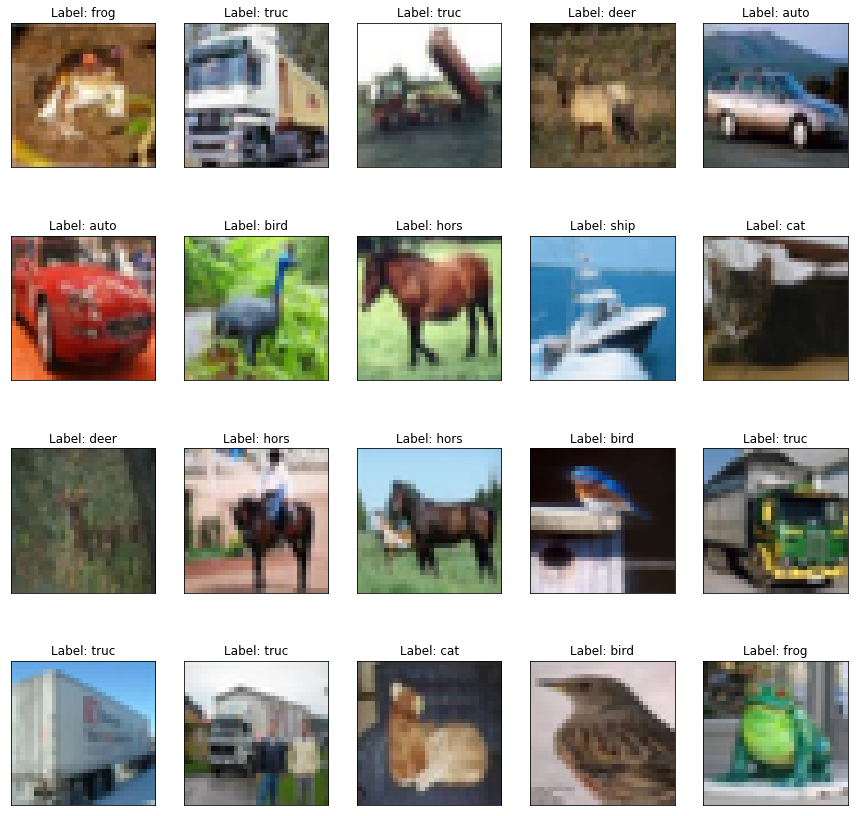

In [10]:
fig, axs = plt.subplots(4,5)
axs = axs.flatten()

plot_index = 0
for ax in axs:
    ax.imshow(train_images[plot_index])
    ax.set_title("Label: {}".format(labels_train[plot_index]))
    ax.set_xticks([])
    ax.set_yticks([])
    plot_index += 1
    fig.set_size_inches(15,15)

## Deep Learning <a name="deep">
Neural networks have many different types of layers, but the main three are recurrent, convolutional and dense.

### Convolutional <a name="convolutional">
The convolutional layers are mainly used for image processing given that these layers use kernel (matrixes) to capture relationships betwwen far apart elements of the input, in case of pictures pixels.
    

![convolutions](convolutions.png "Filters in convolutional networks")
With each Convolutional layer a "Feature map" is calculated and in the end these will be processed by a fully connected layer that will understand the relations between patterns.
![feature](feature_map.png "Feature Maps")

In [17]:
# Structure of the neural network
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(train_images.shape[1:])))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# compile model
opt = tf.keras.optimizers.Adam()
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In this example the loss function is cathegorical cross entropy. This function measures the "distance" of a given class (label) and the probability claculated by the prediction. This loss function is to be maximized (higher accuracy).

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
__________

In [19]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

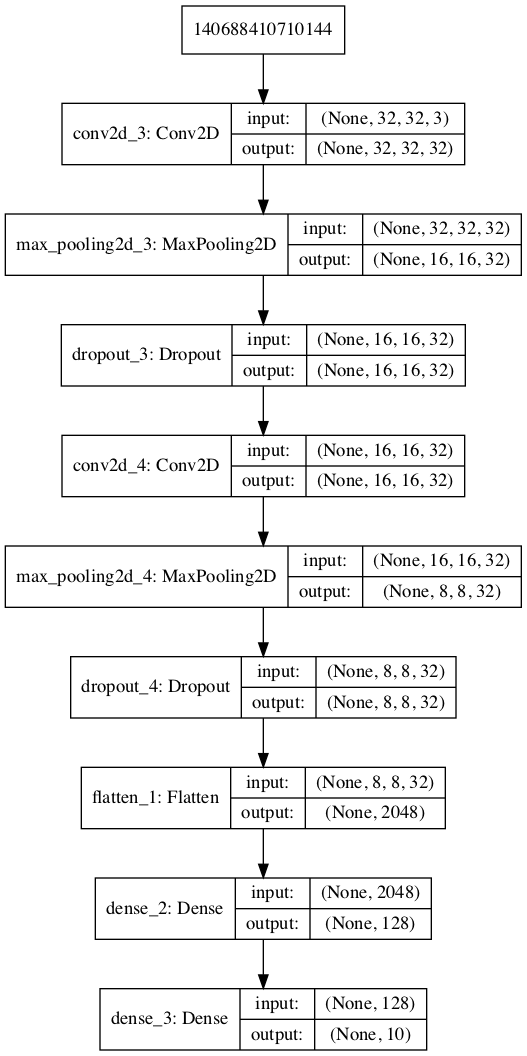

In [20]:
from IPython.display import Image
Image(filename='model_plot.png') 

But our test data does not have the shape 10 at then end. We have to One-hot-encode it. That means create a vector of size 10 with zeros in every position except from the position that belongs to the label.

In [21]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
model.compile(optimizer='adam',
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [22]:
history = model.fit(
    x=train_images, 
    y=train_labels, 
    validation_data=(test_images, test_labels), 
    verbose=1, 
    callbacks=[early_stopping], 
    epochs=30,
    batch_size=500,
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 236s 5ms/step - loss: 2.0298 - acc: 0.2693 - val_loss: 1.6647 - val_acc: 0.4209
Epoch 2/30
50000/50000 [==============================] - 242s 5ms/step - loss: 1.5499 - acc: 0.4439 - val_loss: 1.4516 - val_acc: 0.4858
Epoch 3/30
50000/50000 [==============================] - 243s 5ms/step - loss: 1.3734 - acc: 0.5093 - val_loss: 1.3027 - val_acc: 0.5414
Epoch 4/30
50000/50000 [==============================] - 256s 5ms/step - loss: 1.2658 - acc: 0.5507 - val_loss: 1.2090 - val_acc: 0.5746
Epoch 5/30
50000/50000 [==============================] - 248s 5ms/step - loss: 1.1907 - acc: 0.5796 - val_loss: 1.1429 - val_acc: 0.6014
Epoch 6/30
50000/50000 [==============================] - 253s 5ms/step - loss: 1.1341 - acc: 0.6012 - val_loss: 1.0979 - val_acc: 0.6236
Epoch 7/30
50000/50000 [==============================] - 251s 5ms/step - loss: 1.0809 - acc: 0.6237 - val_loss: 1.0588 - 

In [23]:
model.save(convolutional_path)

We just save the whole model. It can now be loaded and used from the point it is right now

In [6]:
def get_predicted_labels(prediction):
    max_value = 0
    max_index = 0
    for i in range(len(prediction)):
        if prediction[i]>max_value:
            max_value = prediction[i]
            max_index = i
    return dictionary_labels[max_index]
G = lambda x: get_predicted_labels(x)

In [10]:
predictions = model.predict(test_images)
labels_test = np.apply_along_axis(F, 1, test_labels)
labels_predictions = np.apply_along_axis(G, 1, predictions)

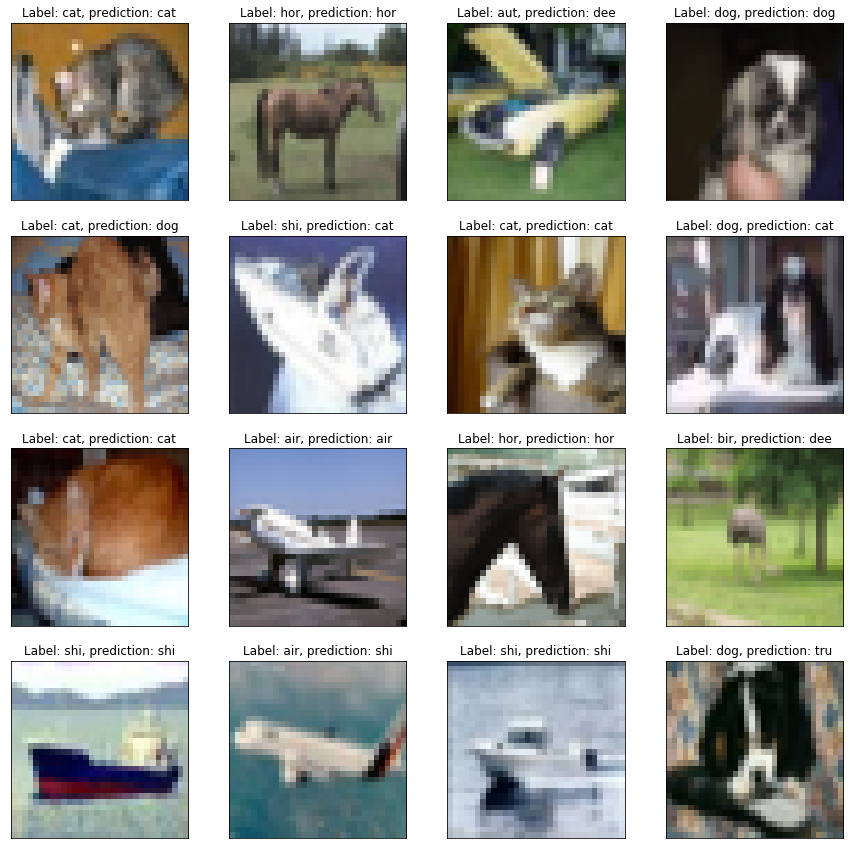

In [11]:
fig, axs = plt.subplots(4,4)
axs = axs.flatten()

plot_index = 0
for ax in axs:
    ax.imshow(test_images[-plot_index])
    ax.set_title("Label: {}, prediction: {}".format(labels_test[-plot_index],labels_predictions[-plot_index]))
    ax.set_xticks([])
    ax.set_yticks([])
    plot_index += 1
    fig.set_size_inches(15,15)

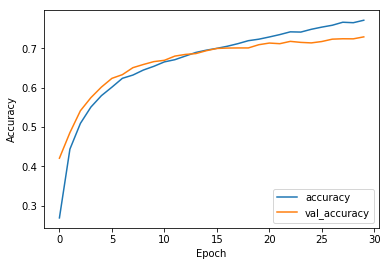

In [28]:
plt.plot(history.history['acc'], label='accuracy')
plt.plot(history.history['val_acc'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


In this case we can see that the accuracy both in training as validation is not in a plateau or going doing, which means we could train it for more EPOCHS to improve the accuracy of our model.

Text(0, 0.5, 'Counts')

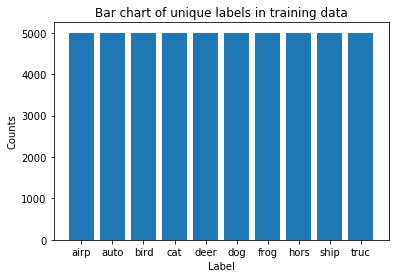

In [29]:
unique, counts = np.unique(labels_train, return_counts=True)
plt.bar(unique, counts)
plt.title('Bar chart of unique labels in training data')
plt.xlabel('Label')
plt.ylabel('Counts')

Text(0, 0.5, 'Counts')

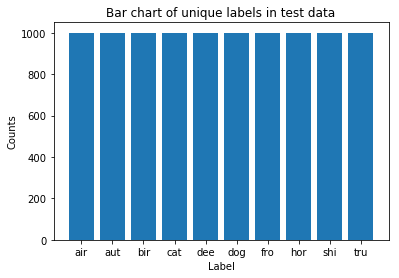

In [30]:
unique, counts = np.unique(labels_test, return_counts=True)
plt.bar(unique, counts)
plt.title('Bar chart of unique labels in test data')
plt.xlabel('Label')
plt.ylabel('Counts')

#### Loading a model <a name="load">

In [9]:
model = tf.keras.models.load_model(convolutional_path)

In [32]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 12s 1ms/step


[0.7994460774421692, 0.7289]

## Recurrent Network <a name="recurrent">
These networks are commonly used for time series data. The difference with the other layers is that these networks use the input and output of the previous layer as the output of the next. Therefore, can mantain a relation between the different levels of the network. There are subkinds of recurrent layers, like GRU and LSTM. These layers add more complex "gates" that allow the network to have very long sequences without having vanishing or exploding gradients.
![rnn](rnn.png)
Other property is that in the middle steps, the RNN can return the state of prediction of the sequence

In [2]:
from sklearn.preprocessing import MinMaxScaler
import os
import keras as k
df_colombia = pd.read_excel("Datasets/Currency/PesoCol.xlsx", names=['Date','Euro','Rate'])
df_colombia.head()

,Date,Euro,Rate
0,01/02/2018,3535.87436,2835.05
1,02/02/2018,3490.93614,2806.67
2,03/02/2018,3522.60329,2832.13
3,04/02/2018,3522.60329,2832.13
4,05/02/2018,3517.78867,2832.13


among other normalization techniques, the min max normalization forces every value between 0 and 1, mantaining the size relation among data points.

$ \tilde{X} = \frac{x- min_x}{max_x - min_x} $  

In [13]:
def build_sequences(data, window_size, target_distance):
    inputs = []
    targets = []
    for i in range(len(data)-(window_size+target_distance)):
        inputs.append(data[i:i+window_size])
        targets.append(data[i+window_size+target_distance]) # Tight now it takes the target being certain days ahead. 
        # A different approach could be to do spaced TS. Every two days to forecast two days ahead in time.
    return np.array(inputs), np.array(targets)
def build_sequences_separation(data, window_size, target_distance, separation):
    inputs = []
    targets = []
    window_size = window_size*separation
    for i in range(len(data)-(window_size+target_distance)):
        inputs.append(data[i:i+window_size:separation])
        targets.append(data[i+window_size+target_distance]) # Right now it takes the target being certain days ahead. 
        # A different approach could be to do spaced TS. Every two days to forecast two days ahead in time.
    return np.array(inputs), np.array(targets)
def extend_prediction(model, data, days):
    temp_data = data
    for i in range(days):
        additional_input = model.predict(temp_data)
        temp_data = []
        for new_i in range(len(additional_input)):
            temp_data.append(np.append(data[new_i][1:], additional_input[new_i]))
        temp_data = np.array(temp_data)
        temp_data = np.expand_dims(temp_data,-1)
    return temp_data

![timewindow](timewindow.jpg)
The time series must be sliced into time windows for forecasting purposes.

In [14]:
# Normalizing data
scaler = MinMaxScaler()
temp_col = np.array(df_colombia.Rate).reshape(-1,1)
temp_col = scaler.fit_transform(temp_col)
X = temp_col[:-200]
y = temp_col[-200:]

In [15]:
# Window size is the size of the time series
# Days ahead is how many days ahead in time from the next entry we want to forecast
# Separation will be how many spaces our time delta will move between entries of the time series
window_size = 14
days_ahead_forecast = 0
separation = 1
X_trn, y_trn = build_sequences(X, window_size, days_ahead_forecast)
print(X_trn.shape, y_trn.shape)
X_tst,y_tst = build_sequences(y, window_size, days_ahead_forecast)
print(X_tst.shape, y_tst.shape)

(890, 14, 1) (890, 1)
(186, 14, 1) (186, 1)


In [16]:
input_layer = k.layers.Input(X_trn.shape[1:])
# CuDNNGRU is the GPU versoin of a GRU. The CPU version woulb be only GRU
hidden_layer = k.layers.GRU(64, return_sequences=True)(input_layer)
# Return sequences will return the same dimension as the input
hidden_layer = k.layers.GRU(64)(hidden_layer)
# Removing the rerturn sequences will return a flattened version of the output
output_layer = k.layers.Dense(1)(hidden_layer)
model = k.Model(inputs=input_layer, outputs=output_layer)

In [18]:
# Different way to save only the weights of the model.
checkpoint_path = "checkpoints/one_day.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=1)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

opt = k.optimizers.adam(lr=0.001)
model.compile(optimizer=opt, loss='mse')
history = model.fit(X_trn, y_trn, epochs=15, batch_size=32, verbose=0, callbacks=[cp_callback, early_stopping])


Epoch 00001: saving model to checkpoints/one_day.ckpt

Epoch 00002: saving model to checkpoints/one_day.ckpt

Epoch 00003: saving model to checkpoints/one_day.ckpt

Epoch 00004: saving model to checkpoints/one_day.ckpt

Epoch 00005: saving model to checkpoints/one_day.ckpt

Epoch 00006: saving model to checkpoints/one_day.ckpt

Epoch 00007: saving model to checkpoints/one_day.ckpt

Epoch 00008: saving model to checkpoints/one_day.ckpt

Epoch 00009: saving model to checkpoints/one_day.ckpt

Epoch 00010: saving model to checkpoints/one_day.ckpt

Epoch 00011: saving model to checkpoints/one_day.ckpt

Epoch 00012: saving model to checkpoints/one_day.ckpt

Epoch 00013: saving model to checkpoints/one_day.ckpt

Epoch 00014: saving model to checkpoints/one_day.ckpt

Epoch 00015: saving model to checkpoints/one_day.ckpt


In regression problems the loss function is usually the distance between the real value and the predicted value. MSE or RMSE. This loss function is to be minimized, to shorten the distance between the two values.

In [19]:
# Reversing the normalization
y_hat = model.predict(X_tst)
y_hat = scaler.inverse_transform(y_hat)
y_tst = scaler.inverse_transform(y_tst)

<Figure size 1296x1296 with 0 Axes>

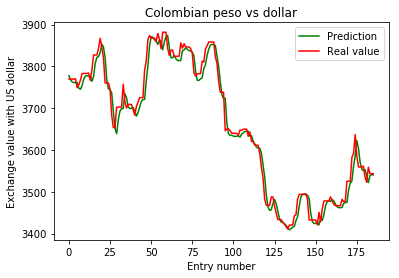

<Figure size 1296x1296 with 0 Axes>

In [20]:
plt.plot(y_hat, label='Prediction', color='green')
plt.plot(y_tst, label='Real value', color='red')
plt.legend()
plt.title('Colombian peso vs dollar')
plt.xlabel('Entry number')
plt.ylabel('Exchange value with US dollar')
plt.figure(figsize=(18,18))

In [21]:
mse = (np.mean((y_hat-y_tst)**2))**0.5
print(mse)

23.120243458829872


In [22]:
# For two days ahead forecast
days_ahead_forecast = 1
X_trn, y_trn = build_sequences(X, window_size, days_ahead_forecast)
print(X_trn.shape, y_trn.shape)
X_tst,y_tst = build_sequences(y, window_size, days_ahead_forecast)
print(X_tst.shape, y_tst.shape)
# Creating model
input_layer = k.layers.Input(X_trn.shape[1:])
hidden_layer = k.layers.GRU(64, return_sequences=True)(input_layer)
hidden_layer = k.layers.GRU(64)(hidden_layer)
output_layer = k.layers.Dense(1)(hidden_layer)
model = k.Model(inputs=input_layer, outputs=output_layer)
# Optimizer and checkpoint
checkpoint_path = "checkpoints/two_day.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=1)

opt = k.optimizers.adam(lr=0.001)
model.compile(optimizer=opt, loss='mse')
history = model.fit(X_trn, y_trn, epochs=15, batch_size=32, verbose=0, callbacks=[cp_callback])

(889, 14, 1) (889, 1)
(185, 14, 1) (185, 1)

Epoch 00001: saving model to checkpoints/two_day.ckpt

Epoch 00002: saving model to checkpoints/two_day.ckpt

Epoch 00003: saving model to checkpoints/two_day.ckpt

Epoch 00004: saving model to checkpoints/two_day.ckpt

Epoch 00005: saving model to checkpoints/two_day.ckpt

Epoch 00006: saving model to checkpoints/two_day.ckpt

Epoch 00007: saving model to checkpoints/two_day.ckpt

Epoch 00008: saving model to checkpoints/two_day.ckpt

Epoch 00009: saving model to checkpoints/two_day.ckpt

Epoch 00010: saving model to checkpoints/two_day.ckpt

Epoch 00011: saving model to checkpoints/two_day.ckpt

Epoch 00012: saving model to checkpoints/two_day.ckpt

Epoch 00013: saving model to checkpoints/two_day.ckpt

Epoch 00014: saving model to checkpoints/two_day.ckpt

Epoch 00015: saving model to checkpoints/two_day.ckpt


In [23]:
# Bringing back the values
y_hat = model.predict(X_tst)
y_hat = scaler.inverse_transform(y_hat)
y_tst = scaler.inverse_transform(y_tst)

<Figure size 1296x1296 with 0 Axes>

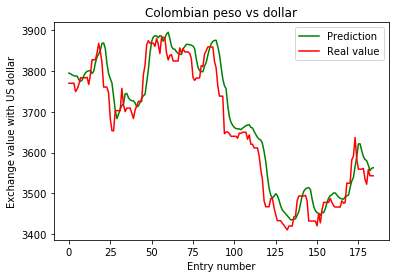

<Figure size 1296x1296 with 0 Axes>

In [24]:
plt.plot(y_hat, label='Prediction', color='green')
plt.plot(y_tst, label='Real value', color='red')
plt.legend()
plt.title('Colombian peso vs dollar')
plt.xlabel('Entry number')
plt.ylabel('Exchange value with US dollar')
plt.figure(figsize=(18,18))

In [25]:
mse = (np.mean((y_hat-y_tst)**2))**0.5
print(mse)

42.627566357212345


Here we can load the weights of the model when train to predict just one day ahead. Different to loading the whole model, here we just saved and loaded the values of the weights (optimized parameters)

In [26]:
# Using one day forecast twice
model.load_weights("checkpoints/one_day.ckpt")
# Using first output in the input for a secong output
additional_input = model.predict(X_tst)
temp_X_tst = []
for new_i in range(len(additional_input)):
    temp_X_tst.append(np.append(X_tst[new_i][1:], additional_input[new_i]))
temp_X_tst = np.array(temp_X_tst)

In [27]:
temp_X_tst = np.expand_dims(temp_X_tst,-1)

<Figure size 1296x1296 with 0 Axes>

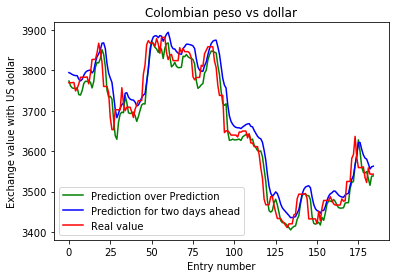

<Figure size 1296x1296 with 0 Axes>

In [28]:
y_hat2 = model.predict(temp_X_tst)
y_hat2 = scaler.inverse_transform(y_hat2)
plt.plot(y_hat2, label='Prediction over Prediction', color='green')
plt.plot(y_hat, label='Prediction for two days ahead', color='blue')
plt.plot(y_tst, label='Real value', color='red')
plt.legend()
plt.title('Colombian peso vs dollar')
plt.xlabel('Entry number')
plt.ylabel('Exchange value with US dollar')
plt.figure(figsize=(18,18))

In [31]:
mse1 = (np.mean((y_hat2-y_tst)**2))**0.5
print("The MSE for the first model is : {}. For the second model is: {}".format(mse, mse1))

The MSE for the first model is : 42.627566357212345. For the second model is: 32.93981324840446


## Dense <a name="dense">
This is the most common layer in neural networks. It is a linear combination for every neuron in the output with all the elements of the input. Every weight is optimized independently with gradient descend based on the loss function.
![dense](dense.png)

In [32]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(train_images.shape[1:])),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
history = model.fit(
    train_images,
    train_labels,
    validation_data=(test_images, test_labels),
    batch_size=1000,
    epochs=5
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 13s 256us/step - loss: 2.2473 - acc: 0.2025 - val_loss: 2.0305 - val_acc: 0.2832
Epoch 2/5
50000/50000 [==============================] - 13s 260us/step - loss: 2.0134 - acc: 0.2712 - val_loss: 1.9229 - val_acc: 0.3165
Epoch 3/5
50000/50000 [==============================] - 13s 264us/step - loss: 1.9486 - acc: 0.2938 - val_loss: 1.8759 - val_acc: 0.3364
Epoch 4/5
50000/50000 [==============================] - 14s 272us/step - loss: 1.9134 - acc: 0.3061 - val_loss: 1.8356 - val_acc: 0.3437
Epoch 5/5
50000/50000 [==============================] - 14s 280us/step - loss: 1.8803 - acc: 0.3190 - val_loss: 1.8160 - val_acc: 0.3579


## Important topics to remember
### Losses
Regression: RMSE, MSE, SMAPE
Classification: F1-score, Cathegorical cross entropy
### Layer types
Convoltional
RNN, LSTM, GRU
Dense layers
### Optimizers
SGD, Adam, Adagrad
### Activation Functions
ReLu, Linear: For numeric values
Tanh, Sigmoid: For binary classification
Softmax: For multiple classification

# Then end :)
<br>
 <br>
 <br>
 <br>
 <br>
 <br>
 <br>
 <br>
 <br>
<br>
 <br>
  <br>
<br>
<br>
 <br>
 <br>
 <br>
 <br>
 <br>
 <br>
 <br>
 <br>
<br>
 <br>
  <br>
<br>
See you later